In [1]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm

# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#fix balcony column
# drop columns lattitude longtitude eircode 

In [2]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv('/Users/patrickmoloney/Downloads/data-rental2.csv', na_values = missing_value_formats)

In [3]:
df.head()

,approx,number,address 1,address 2,address 3,eircode,lattitude,longtitude,lattitude eyre square,longtitude eyre square,...,Distance GMIT,number of rooms,number of bathrooms,price per month,type,connection,BER,balcony,floor,heating
0,no,Chaplaincy House,Ballybane Road,Ballybane,NaN,H91 E2NY,53.279666,-9.008728,53.274839,-9.04863,...,0.209452,4,2,2100,house,NaN,d2,no,NaN,central
1,yes,NaN,cappagh road,knocknacarra,NaN,H91 PV0Y,53.271272,-9.132431,53.274839,-9.04863,...,8.135066,1,1,850,apartment,NaN,c1,no,ground,central
2,no,83,Maoilin,Ballymoneen Road,Moneen,H91 A6CH,53.271473,-9.121873,53.274839,-9.04863,...,7.434207,3,2,1800,house,NaN,a3,no,NaN,central
3,no,NaN,NaN,NaN,NaN,H91 W5RP,53.272302,-9.077226,53.274839,-9.04863,...,4.475861,1,1,850,apartment,NaN,NaN,no,ground,central
4,no,NaN,NaN,NaN,NaN,H91 K46R,53.273859,-9.026788,53.274839,-9.04863,...,1.176212,3,2,1600,house,NaN,d1,no,NaN,central


In [4]:
df.isna().sum()


approx                    206
number                    256
address 1                 194
address 2                 237
address 3                 360
eircode                   237
lattitude                   0
longtitude                  0
lattitude eyre square       0
longtitude eyre square      0
Distance Eyre Square        0
latitude salthill           0
longtitude salthill         0
Distance Salthill           0
latitude collage            0
longtitude collage          0
Distance NUIG               0
latitude gmit               0
longtitude gmit             0
Distance GMIT               0
number of rooms             0
number of bathrooms         0
price per month             0
type                        0
connection                265
BER                        14
balcony                     2
floor                     184
heating                     5
dtype: int64

In [5]:
df=df.drop(columns='eircode')
df=df.drop(columns='lattitude') 
df=df.drop(columns='longtitude')
df=df.drop(columns='approx')
df=df.drop(columns='number')
df=df.drop(columns='address 1')
df=df.drop(columns='address 2')
df=df.drop(columns='address 3')
df=df.drop(columns='lattitude eyre square')
df=df.drop(columns='longtitude eyre square')
df=df.drop(columns='latitude salthill')
df=df.drop(columns='longtitude salthill')
df=df.drop(columns='latitude collage')
df=df.drop(columns='longtitude collage')
df=df.drop(columns='latitude gmit')
df=df.drop(columns='longtitude gmit')
# thse change depending on the thing we're looking at 
df=df.drop(columns='floor') 
df=df.drop(columns='connection') 
#df=df.drop(columns='balcony') 

In [6]:
df.isna().sum()

Distance Eyre Square     0
Distance Salthill        0
Distance NUIG            0
Distance GMIT            0
number of rooms          0
number of bathrooms      0
price per month          0
type                     0
BER                     14
balcony                  2
heating                  5
dtype: int64

In [7]:
df.head()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,type,BER,balcony,heating
0,2.706816,4.449858,3.520573,0.209452,4,2,2100,house,d2,no,central
1,5.586384,4.231058,4.789334,8.135066,1,1,850,apartment,c1,no,central
2,4.884620,3.551142,4.097072,7.434207,3,2,1800,house,a3,no,central
3,1.922237,1.068662,1.296991,4.475861,1,1,850,apartment,NaN,no,central
4,1.456473,3.093256,2.398740,1.176212,3,2,1600,house,d1,no,central


In [8]:
#take a look at columns
df.BER.unique() 

array(['d2', 'c1', 'a3', nan, 'd1', 'c3', 'c2', 'e1', 'exempt', 'e2',
       'b3', 'b1', 'f', 'b2', 'a1', 'g'], dtype=object)

In [9]:
df.heating.unique() 

array(['central', 'electric', nan], dtype=object)

In [10]:
df.type.unique()

array(['house', 'apartment', 'studio', 'townhouse'], dtype=object)

In [11]:
df.balcony.unique()

array(['no', 'yes', nan], dtype=object)

In [12]:
#only ber and heating has missing values 
df = df.dropna() #drop nan values , not removing 'na' values need to fix that 

In [13]:
df.type.unique()

array(['house', 'apartment', 'studio', 'townhouse'], dtype=object)

In [14]:
df.heating.unique()

array(['central', 'electric'], dtype=object)

In [15]:
df.BER.unique()

array(['d2', 'c1', 'a3', 'd1', 'c3', 'c2', 'e1', 'exempt', 'e2', 'b3',
       'b1', 'f', 'b2', 'a1', 'g'], dtype=object)

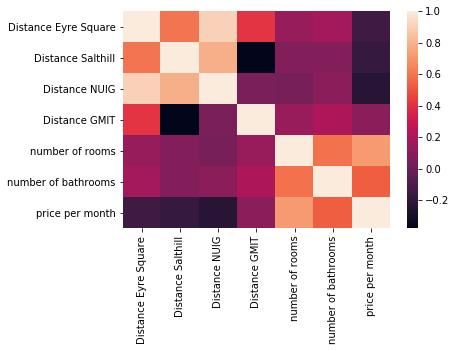

In [16]:
sns.heatmap(df.corr());

inverse for distances bar gmit
number of rooms and baths 

lots of categorical stuff here so don't pay too much attention to it 

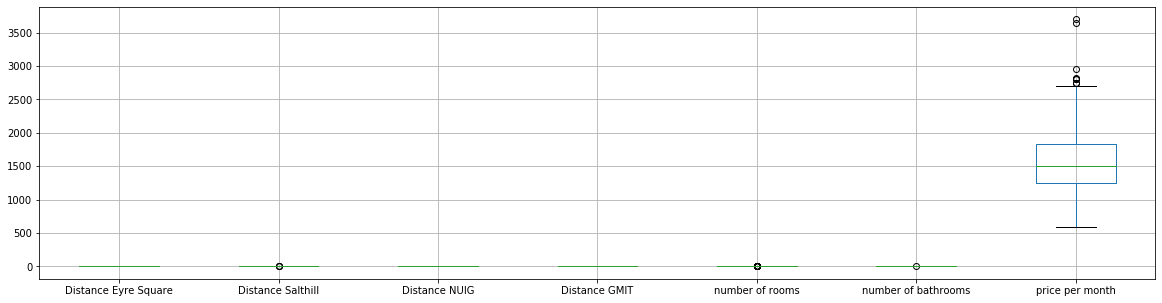

In [17]:
df.boxplot(figsize=(20,5))
plt.show() #outliers, distance from salthill, number of rooms and number of baths, should consider removing those 

In [18]:
import matplotlib.pyplot as plt
import numpy as np

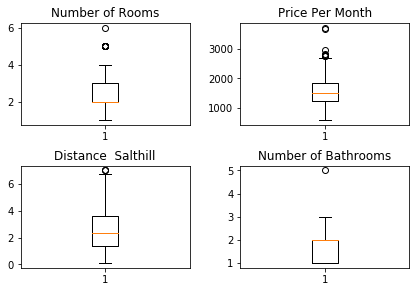

In [19]:
import matplotlib.pyplot as plt
import numpy as np


fig, axs = plt.subplots(2, 2)


axs[0, 0].boxplot(df['number of rooms'])
axs[0, 0].set_title('Number of Rooms')

axs[0, 1].boxplot(df['price per month'])
axs[0, 1].set_title('Price Per Month')

axs[1, 1].boxplot(df['number of bathrooms'])
axs[1, 1].set_title('Number of Bathrooms')

axs[1, 0].boxplot(df['Distance Salthill'])
axs[1, 0].set_title('Distance  Salthill')

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

plt.show()

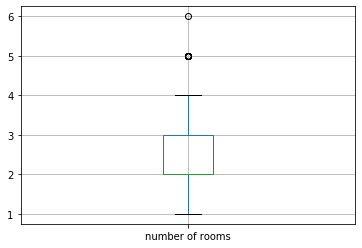

In [20]:
df.boxplot(column='number of rooms')
plt.show()

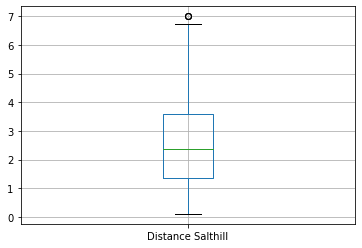

In [21]:
df.boxplot(column='Distance Salthill')
plt.show()

things can be far away from certain palces 


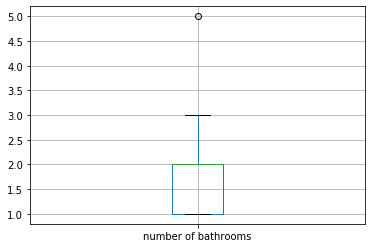

In [22]:
df.boxplot(column='number of bathrooms')
plt.show()

was some big houses 

In [23]:
df.describe()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,2.264945,2.639864,2.303819,3.541791,2.515873,1.751323,1559.224868
std,1.454716,1.655613,1.453199,1.848706,1.055998,0.733120,469.247651
min,0.007512,0.099173,0.311939,0.209452,1.000000,1.000000,595.000000
25%,1.012972,1.357497,1.118415,2.218692,2.000000,1.000000,1250.000000
50%,2.092012,2.362079,1.785046,3.154629,2.000000,2.000000,1500.000000
75%,3.051279,3.583553,3.277126,4.706173,3.000000,2.000000,1830.000000
max,5.586384,7.005967,6.308555,8.135066,6.000000,5.000000,3700.000000


In [24]:
df.head()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,type,BER,balcony,heating
0,2.706816,4.449858,3.520573,0.209452,4,2,2100,house,d2,no,central
1,5.586384,4.231058,4.789334,8.135066,1,1,850,apartment,c1,no,central
2,4.884620,3.551142,4.097072,7.434207,3,2,1800,house,a3,no,central
4,1.456473,3.093256,2.398740,1.176212,3,2,1600,house,d1,no,central
5,2.313815,1.099351,1.721166,4.863595,4,2,2390,house,c3,no,central


In [25]:
df.BER.unique()

array(['d2', 'c1', 'a3', 'd1', 'c3', 'c2', 'e1', 'exempt', 'e2', 'b3',
       'b1', 'f', 'b2', 'a1', 'g'], dtype=object)

In [26]:
scale_mapper = {
    "a1":15,
    "a2":14,
    "a3":13,
    "b1":12,
    "b2":11,
    "b3":10,
    "c1":9,
    "c2":8,
    "c3":7,
    "d1":6,
    "d2":5,
    "e1":4,
    "e2":3,
    "f":2,
    "g":1,
    "exempt":0
}

df['BER'] = df['BER'].replace(scale_mapper)

df.tail()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,type,BER,balcony,heating
390,2.345123,0.456042,2.242454,4.693170,2,1,1600,apartment,5,no,electric
391,1.539927,0.356783,1.500652,3.960231,5,2,2000,house,6,no,central
392,1.398883,0.528898,1.540958,3.739695,1,1,920,apartment,4,no,electric
393,5.087938,6.748020,5.912348,2.534640,1,1,810,apartment,0,no,central
394,4.670141,6.348894,5.487608,2.116635,2,1,1136,apartment,5,no,electric


In [27]:
df = pd.get_dummies(df, columns=['type','balcony','heating'])
df.tail()

#this gives us dummy variables for the categorical columns remaining, for mext run might be worth removing the balcony when examing both

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,type_apartment,type_house,type_studio,type_townhouse,balcony_no,balcony_yes,heating_central,heating_electric
390,2.345123,0.456042,2.242454,4.693170,2,1,1600,5,1,0,0,0,1,0,0,1
391,1.539927,0.356783,1.500652,3.960231,5,2,2000,6,0,1,0,0,1,0,1,0
392,1.398883,0.528898,1.540958,3.739695,1,1,920,4,1,0,0,0,1,0,0,1
393,5.087938,6.748020,5.912348,2.534640,1,1,810,0,1,0,0,0,1,0,1,0
394,4.670141,6.348894,5.487608,2.116635,2,1,1136,5,1,0,0,0,1,0,0,1


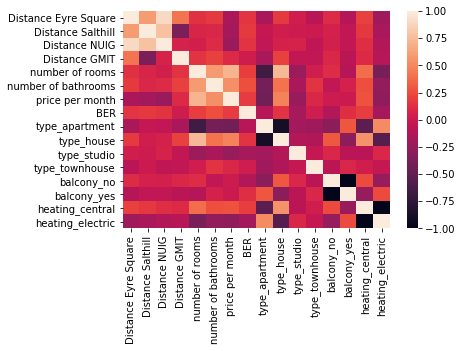

In [28]:
sns.heatmap(df.corr());

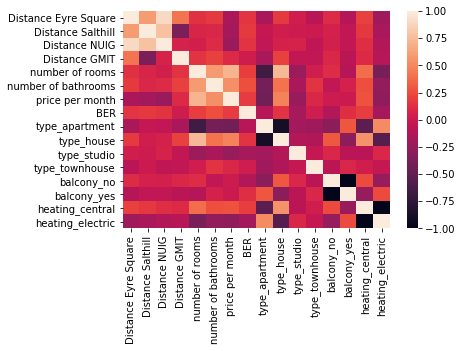

In [29]:
df_new=df.rename(columns={'pricer per month': 'price per month'})
df_new=df_new.rename(columns={'number of baths rooms': 'number of bath rooms'})
sns.heatmap(df_new.corr());

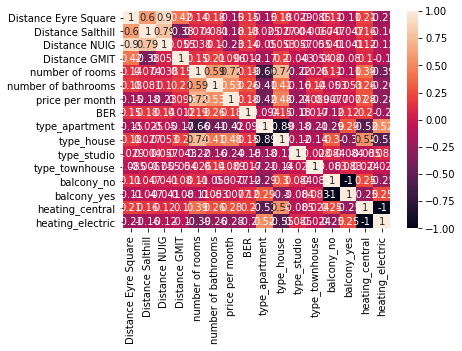

In [30]:
correlation_mat = df_new.corr()

sns.heatmap(correlation_mat, annot = True)

plt.show()

inverse electric
positive central
townhouse +
studio -
house+
ber+
distance - but gmit 


In [31]:
del df['balcony_no']

In [32]:
del df['heating_central']

In [33]:
del df['type_townhouse']

In [34]:
# balcony_no, heating_central type_townhouse

In [35]:
df.head()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,type_apartment,type_house,type_studio,balcony_yes,heating_electric
0,2.706816,4.449858,3.520573,0.209452,4,2,2100,5,0,1,0,0,0
1,5.586384,4.231058,4.789334,8.135066,1,1,850,9,1,0,0,0,0
2,4.884620,3.551142,4.097072,7.434207,3,2,1800,13,0,1,0,0,0
4,1.456473,3.093256,2.398740,1.176212,3,2,1600,6,0,1,0,0,0
5,2.313815,1.099351,1.721166,4.863595,4,2,2390,7,0,1,0,0,0


In [36]:
df['price per month'].unique()

array([2100,  850, 1800, 1600, 2390, 1500, 2000,  650, 1000, 2800, 1200,
       1050,  900, 1300, 2500,  620, 1695, 2750, 1740, 2825, 2400, 1100,
       1350, 2240,  846, 1246, 1250, 1850, 1750, 1340, 1280, 1175,  820,
       1308, 2150,  800, 1020, 2490, 2340, 1700, 1669, 1265, 2280, 1192,
       1450, 1399, 2200, 1950, 1887, 1400, 1096, 2640, 1560, 2300, 2700,
       1309, 1795, 1550, 1107, 1650, 1145, 1545, 2680, 1040, 1092, 1070,
       2375, 1510, 1120,  950, 2050, 1983, 1218, 1440, 1900, 1940, 3640,
        930, 1316, 1275, 1395,  595, 2600,  790, 1370,  695, 1057, 1733,
       1235, 2950, 1493, 1180, 1543, 1872, 1985, 1375, 1495, 1637, 2331,
       1075, 3700, 1389, 1840, 1880, 1742, 1028, 2080, 1270, 1318, 1230,
       1215, 1060, 1015, 1260,  980, 1512,  852, 2175, 1575, 1791, 1470,
       1790,  920,  810, 1136])

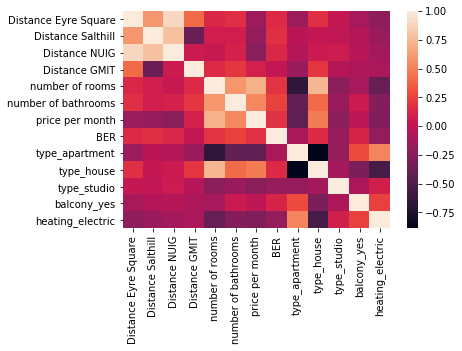

In [37]:
sns.heatmap(df.corr());


In [38]:
df.corr() #correlcation matric, similar to above but just the numbers 

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,type_apartment,type_house,type_studio,balcony_yes,heating_electric
Distance Eyre Square,1.000000,0.598137,0.903420,0.416351,0.138970,0.177724,-0.153024,0.150945,-0.152310,0.177900,0.029091,-0.108905,-0.208747
Distance Salthill,0.598137,1.000000,0.786943,-0.379555,0.073891,0.081062,-0.182766,0.176269,-0.024916,0.026735,0.004041,-0.047175,-0.164165
Distance NUIG,0.903420,0.786943,1.000000,0.054698,0.037726,0.102468,-0.232895,0.143013,-0.050297,0.053392,0.057459,-0.040680,-0.121557
Distance GMIT,0.416351,-0.379555,0.054698,1.000000,0.145281,0.207835,0.096442,0.012430,-0.166100,0.203987,-0.043308,-0.080423,-0.099615
number of rooms,0.138970,0.073891,0.037726,0.145281,1.000000,0.587576,0.716419,0.192017,-0.658590,0.737502,-0.224483,-0.113256,-0.388718
number of bathrooms,0.177724,0.081062,0.102468,0.207835,0.587576,1.000000,0.533281,0.259461,-0.405056,0.413939,-0.160264,0.053119,-0.261524
price per month,-0.153024,-0.182766,-0.232895,0.096442,0.716419,0.533281,1.000000,0.183135,-0.424563,0.478792,-0.238021,-0.007736,-0.278728
BER,0.150945,0.176269,0.143013,0.012430,0.192017,0.259461,0.183135,1.000000,-0.093954,0.146846,-0.178483,0.120431,-0.195201
type_apartment,-0.152310,-0.024916,-0.050297,-0.166100,-0.658590,-0.405056,-0.424563,-0.093954,1.000000,-0.889681,-0.184285,0.289436,0.515968
type_house,0.177900,0.026735,0.053392,0.203987,0.737502,0.413939,0.478792,0.146846,-0.889681,1.000000,-0.117750,-0.300639,-0.547515


In [39]:
df.head()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,type_apartment,type_house,type_studio,balcony_yes,heating_electric
0,2.706816,4.449858,3.520573,0.209452,4,2,2100,5,0,1,0,0,0
1,5.586384,4.231058,4.789334,8.135066,1,1,850,9,1,0,0,0,0
2,4.884620,3.551142,4.097072,7.434207,3,2,1800,13,0,1,0,0,0
4,1.456473,3.093256,2.398740,1.176212,3,2,1600,6,0,1,0,0,0
5,2.313815,1.099351,1.721166,4.863595,4,2,2390,7,0,1,0,0,0


In [40]:
df.head()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,type_apartment,type_house,type_studio,balcony_yes,heating_electric
0,2.706816,4.449858,3.520573,0.209452,4,2,2100,5,0,1,0,0,0
1,5.586384,4.231058,4.789334,8.135066,1,1,850,9,1,0,0,0,0
2,4.884620,3.551142,4.097072,7.434207,3,2,1800,13,0,1,0,0,0
4,1.456473,3.093256,2.398740,1.176212,3,2,1600,6,0,1,0,0,0
5,2.313815,1.099351,1.721166,4.863595,4,2,2390,7,0,1,0,0,0


In [41]:
robust_scaler = StandardScaler()

df[['Distance Eyre Square',
    'Distance Salthill','Distance NUIG','Distance GMIT','number of rooms','number of bathrooms']] = robust_scaler.fit_transform(df[['Distance Eyre Square',
    'Distance Salthill','Distance NUIG','Distance GMIT','number of rooms','number of bathrooms']])



In [42]:
df.BER.unique()

array([ 5,  9, 13,  6,  7,  8,  4,  0,  3, 10, 12,  2, 11, 15,  1])

In [43]:
df['BER'] = df['BER']/15


In [44]:
df.BER.unique() #has a non numerical value in there 

array([0.33333333, 0.6       , 0.86666667, 0.4       , 0.46666667,
       0.53333333, 0.26666667, 0.        , 0.2       , 0.66666667,
       0.8       , 0.13333333, 0.73333333, 1.        , 0.06666667])

In [45]:
df.corr()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,type_apartment,type_house,type_studio,balcony_yes,heating_electric
Distance Eyre Square,1.000000,0.598137,0.903420,0.416351,0.138970,0.177724,-0.153024,0.150945,-0.152310,0.177900,0.029091,-0.108905,-0.208747
Distance Salthill,0.598137,1.000000,0.786943,-0.379555,0.073891,0.081062,-0.182766,0.176269,-0.024916,0.026735,0.004041,-0.047175,-0.164165
Distance NUIG,0.903420,0.786943,1.000000,0.054698,0.037726,0.102468,-0.232895,0.143013,-0.050297,0.053392,0.057459,-0.040680,-0.121557
Distance GMIT,0.416351,-0.379555,0.054698,1.000000,0.145281,0.207835,0.096442,0.012430,-0.166100,0.203987,-0.043308,-0.080423,-0.099615
number of rooms,0.138970,0.073891,0.037726,0.145281,1.000000,0.587576,0.716419,0.192017,-0.658590,0.737502,-0.224483,-0.113256,-0.388718
number of bathrooms,0.177724,0.081062,0.102468,0.207835,0.587576,1.000000,0.533281,0.259461,-0.405056,0.413939,-0.160264,0.053119,-0.261524
price per month,-0.153024,-0.182766,-0.232895,0.096442,0.716419,0.533281,1.000000,0.183135,-0.424563,0.478792,-0.238021,-0.007736,-0.278728
BER,0.150945,0.176269,0.143013,0.012430,0.192017,0.259461,0.183135,1.000000,-0.093954,0.146846,-0.178483,0.120431,-0.195201
type_apartment,-0.152310,-0.024916,-0.050297,-0.166100,-0.658590,-0.405056,-0.424563,-0.093954,1.000000,-0.889681,-0.184285,0.289436,0.515968
type_house,0.177900,0.026735,0.053392,0.203987,0.737502,0.413939,0.478792,0.146846,-0.889681,1.000000,-0.117750,-0.300639,-0.547515


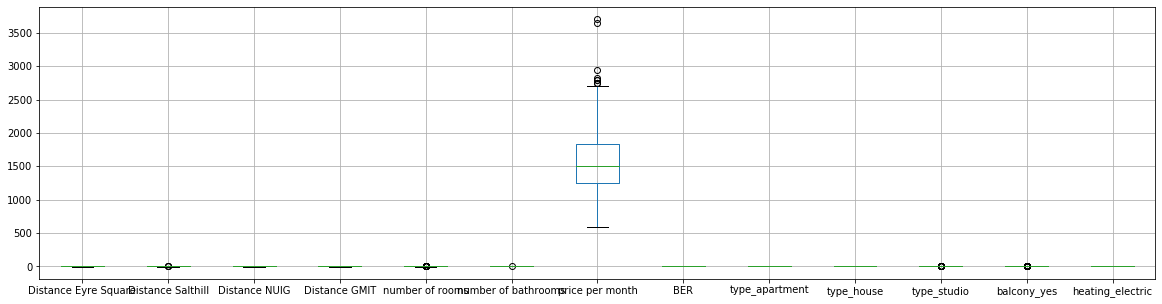

In [46]:
df.boxplot(figsize=(20,5))
plt.show() 

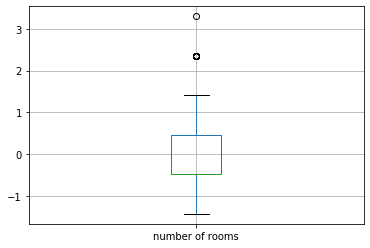

In [47]:
df.boxplot(column='number of rooms')
plt.show()

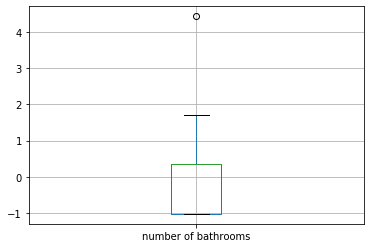

In [48]:
df.boxplot(column='number of bathrooms')
plt.show()


In [49]:
df.describe()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,type_apartment,type_house,type_studio,balcony_yes,heating_electric
count,3.780000e+02,3.780000e+02,3.780000e+02,3.780000e+02,3.780000e+02,3.780000e+02,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,-1.409807e-17,-3.759485e-17,9.633681e-17,4.775721e-16,2.026598e-17,-1.938485e-16,1559.224868,0.407231,0.582011,0.362434,0.023810,0.224868,0.399471
std,1.001325e+00,1.001325e+00,1.001325e+00,1.001325e+00,1.001325e+00,1.001325e+00,469.247651,0.220509,0.493882,0.481340,0.152657,0.418049,0.490439
min,-1.553860e+00,-1.536626e+00,-1.372503e+00,-1.804914e+00,-1.437391e+00,-1.026187e+00,595.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.617713e-01,-7.755835e-01,-8.168020e-01,-7.166378e-01,-4.891645e-01,-1.026187e+00,1250.000000,0.266667,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.190355e-01,-1.680060e-01,-3.574599e-01,-2.097005e-01,-4.891645e-01,3.396535e-01,1500.000000,0.466667,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5.412578e-01,5.707495e-01,6.706563e-01,6.306710e-01,4.590620e-01,3.396535e-01,1830.000000,0.583333,1.000000,1.000000,0.000000,0.000000,1.000000
max,2.286249e+00,2.640647e+00,2.759460e+00,2.487883e+00,3.303742e+00,4.437176e+00,3700.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
import statsmodels.api as sn #from udemy course 

In [51]:
X = sn.add_constant(df['number of rooms'])

In [52]:
ln=sn.OLS(df['price per month'],X).fit()

In [53]:
ln.summary() #significant relationship between price and room number r^2 needs to be greater than .5 P wants to be close to 0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price per month   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     396.5
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           9.34e-61
Time:                        13:45:06   Log-Likelihood:                -2724.9
No. Observations:                 378   AIC:                             5454.
Df Residuals:                     376   BIC:                             5462.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1559.2249     16.861     92.475      0.000    1526.071    1592.379
number of rooms   335.7328     16.861     19.912      0.000     302.579     368.886
==============================================================================
Omnibus:                       52.227   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.151
Skew:                           0.785   Prob(JB):                     8.01e-22
Kurtosis:                       4.925   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
y=df['price per month']

In [55]:
x=df[['number of rooms']]

In [56]:
ln2=LinearRegression()

In [57]:
ln2.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
print(ln2.intercept_,ln2.coef_)

1559.2248677248676 [335.73276279]


In [59]:
#help(ln2)

In [60]:
#ln2.predict(x)

In [61]:
#help(sns.jointplot) #kind is auto set to scatter, we need reg 

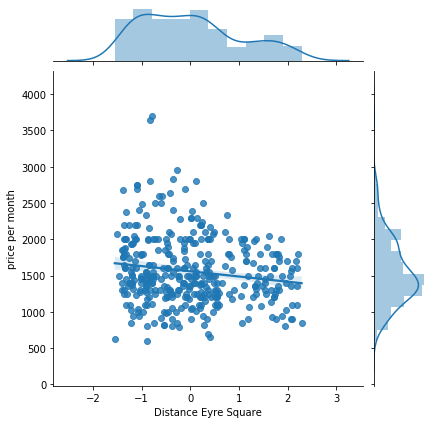

In [62]:
sns.jointplot(x=df['Distance Eyre Square'],y=df['price per month'],data=df,kind='reg')

In [63]:
x_multi=df.drop('price per month',axis=1) 

#grabbing all variables bar the price, since we dropped the column need to add the axis=1 thing

In [64]:
x_multi.head()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,BER,type_apartment,type_house,type_studio,balcony_yes,heating_electric
0,0.304154,1.094696,0.838403,-1.804914,1.407289,0.339654,0.333333,0,1,0,0,0
1,2.286249,0.962364,1.712642,2.487883,-1.437391,-1.026187,0.600000,1,0,0,0,0
2,1.803202,0.551147,1.235639,2.108272,0.459062,0.339654,0.866667,0,1,0,0,0
4,-0.556496,0.274215,0.065406,-1.281282,0.459062,0.339654,0.400000,0,1,0,0,0
5,0.033638,-0.931712,-0.401477,0.715937,1.407289,0.339654,0.466667,0,1,0,0,0


In [65]:
y_multi = df['price per month']

In [66]:
y_multi.head()

0    2100
1     850
2    1800
4    1600
5    2390
Name: price per month, dtype: int64

In [67]:
x_multi_cons=sn.add_constant(x_multi) #adding constant 

In [68]:
x_multi_cons.head() # proxy for beta_0

,const,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,BER,type_apartment,type_house,type_studio,balcony_yes,heating_electric
0,1.0,0.304154,1.094696,0.838403,-1.804914,1.407289,0.339654,0.333333,0,1,0,0,0
1,1.0,2.286249,0.962364,1.712642,2.487883,-1.437391,-1.026187,0.600000,1,0,0,0,0
2,1.0,1.803202,0.551147,1.235639,2.108272,0.459062,0.339654,0.866667,0,1,0,0,0
4,1.0,-0.556496,0.274215,0.065406,-1.281282,0.459062,0.339654,0.400000,0,1,0,0,0
5,1.0,0.033638,-0.931712,-0.401477,0.715937,1.407289,0.339654,0.466667,0,1,0,0,0


In [69]:
ln_multi=sn.OLS(y_multi,x_multi_cons).fit()


In [70]:
ln_multi.summary() #low f so our varaibles do have impact, lower P valuse the more significant the variable is 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        price per month   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     52.13
Date:                Mon, 23 Aug 2021   Prob (F-statistic):           1.40e-71
Time:                        13:45:07   Log-Likelihood:                -2672.3
No. Observations:                 378   AIC:                             5371.
Df Residuals:                     365   BIC:                             5422.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1605.7438     91.575     17.535      0.000    1425.663    1785.824
Distance Eyre Square  -124.0378     78.672     -1.577      0.116    -278.745      30.670
Distance Salthill      -86.7942     38.209     -2.272      0.024    -161.931     -11.657
Distance NUIG           45.9561     65.498      0.702      0.483     -82.845     174.757
Distance GMIT            2.8427     41.167      0.069      0.945     -78.112      83.797
number of rooms        321.4053     25.844     12.436      0.000     270.583     372.228
number of bathrooms     86.4137     19.699      4.387      0.000      47.676     125.151
BER                    113.6088     73.075      1.555      0.121     -30.091     257.309
type_apartment         -15.3900     89.632     -0.172      0.864    -191.651     160.871
type_house            -130.0614     93.272     -1.394      0.164    -313.480      53.357
type_studio           -162.8053    136.750     -1.191      0.235    -431.721     106.111
balcony_yes              2.5556     39.595      0.065      0.949     -75.307      80.418
heating_electric       -83.5768     38.431     -2.175      0.030    -159.150      -8.004
==============================================================================
Omnibus:                       47.890   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.405
Skew:                           0.576   Prob(JB):                     1.46e-30
Kurtosis:                       5.719   Cond. No.                         20.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

number of rooms,
baths
a lot of the P values are pretty big, larger than the .5 we were looking for 

very different when you put in the balcony value 


In [71]:
lm3=LinearRegression()

In [72]:
lm3.fit(x_multi,y_multi)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [73]:
print(lm3.intercept_,lm3.coef_) 


1605.7437837656942 [-124.03779694  -86.79424155   45.95605728    2.84266498  321.4052651
   86.41368658  113.60883381  -15.39001131 -130.06143282 -162.80534054
    2.55556328  -83.57677336]


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,Y_train,Y_test =train_test_split(x_multi,y_multi, test_size = 0.2,random_state=0)

In [77]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape) #size od sets

(302, 12) (76, 12) (302,) (76,)


In [78]:
ln_a =LinearRegression()

In [79]:
ln_a.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
Y_test_a=ln_a.predict(X_test)

In [81]:
Y_train_a=ln_a.predict(X_train)

In [82]:
from sklearn.metrics import r2_score

In [83]:
r2_score(Y_test,Y_test_a) 

0.5301324433530405

In [84]:
r2_score(Y_train,Y_train_a)

0.6441175271789614

In [85]:
y_pred=lm3.predict(X_test)

In [86]:
def rmse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))*100

    return loss #https://stackoverflow.com/questions/53165807/how-to-calculate-rmspe-in-python-using-numpy


In [87]:
from sklearn import metrics 

print('R2:',r2_score(Y_test,Y_test_a))
print('MAE:', metrics.mean_absolute_error(Y_test,y_pred))
print('MSE:',metrics.mean_squared_error(Y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print:('RMSPE:',rmse(Y_test,y_pred))

R2: 0.5301324433530405
MAE: 186.14688576604513
MSE: 70272.37349936174
RMSE: 265.0893688916282


In [88]:
from sklearn import preprocessing #ridhge lasso stuff

In [89]:
scaler=preprocessing.StandardScaler().fit(X_train) # needs to be standardised to woirk with ridge 

In [90]:
#X_train_s=scaler.transform(X_train)
X_train_s=X_train

In [91]:
#X_test_s=scaler.transform(X_test)
X_test_s=X_test

In [92]:
from sklearn.linear_model import Ridge

In [93]:
ln_r=Ridge(alpha=0.5)
ln_r.fit(X_train_s,Y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [94]:
r2_score(Y_test,ln_r.predict(X_test_s))

0.5311084326885036

In [95]:
print(ln_r.intercept_,ln_r.coef_) #describes the line thats being drawn

1577.865078078964 [ -57.60206433 -110.5165028    11.04533719  -22.5388137   358.9693612
   67.85790949   85.29815109   25.34194393 -111.72674725 -152.01403401
    5.18654788  -62.20869707]


In [96]:
y_pred3=ln_r.predict(X_test)

In [97]:
from sklearn import metrics 
print('R2:', r2_score(Y_test,ln_r.predict(X_test_s)))
print('MAE:', metrics.mean_absolute_error(Y_test,y_pred3))
print('MSE:',metrics.mean_squared_error(Y_test,y_pred3))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred3)))

R2: 0.5311084326885036
MAE: 198.40525365202362
MSE: 79851.79976631577
RMSE: 282.58060755528817


In [98]:
from sklearn.model_selection import validation_curve

In [99]:
param_range=np.logspace(-2,8,100) #creates 100 values

In [100]:
param_range


array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [101]:
train_scores,test_scores=validation_curve(Ridge(),X_train_s,Y_train,"alpha",param_range,scoring='r2')

In [102]:
print(train_scores)
print(test_scores)

[[6.37634838e-01 6.24301274e-01 6.80790443e-01 6.38192900e-01
  6.59421984e-01]
 [6.37634812e-01 6.24301229e-01 6.80790432e-01 6.38192856e-01
  6.59421977e-01]
 [6.37634770e-01 6.24301158e-01 6.80790415e-01 6.38192786e-01
  6.59421966e-01]
 [6.37634704e-01 6.24301044e-01 6.80790389e-01 6.38192676e-01
  6.59421949e-01]
 [6.37634600e-01 6.24300864e-01 6.80790347e-01 6.38192502e-01
  6.59421922e-01]
 [6.37634435e-01 6.24300581e-01 6.80790280e-01 6.38192226e-01
  6.59421878e-01]
 [6.37634174e-01 6.24300133e-01 6.80790175e-01 6.38191791e-01
  6.59421809e-01]
 [6.37633764e-01 6.24299430e-01 6.80790008e-01 6.38191108e-01
  6.59421699e-01]
 [6.37633120e-01 6.24298329e-01 6.80789745e-01 6.38190037e-01
  6.59421524e-01]
 [6.37632112e-01 6.24296609e-01 6.80789330e-01 6.38188364e-01
  6.59421247e-01]
 [6.37630543e-01 6.24293937e-01 6.80788677e-01 6.38185764e-01
  6.59420807e-01]
 [6.37628111e-01 6.24289813e-01 6.80787654e-01 6.38181747e-01
  6.59420111e-01]
 [6.37624369e-01 6.24283491e-01 6.807860

In [103]:
train_mean=np.mean(train_scores,axis=1)

In [104]:
test_mean=np.mean(test_scores,axis=1)

In [105]:
train_mean

array([6.48068288e-01, 6.48068261e-01, 6.48068219e-01, 6.48068153e-01,
       6.48068047e-01, 6.48067880e-01, 6.48067617e-01, 6.48067202e-01,
       6.48066551e-01, 6.48065532e-01, 6.48063946e-01, 6.48061487e-01,
       6.48057702e-01, 6.48051920e-01, 6.48043169e-01, 6.48030067e-01,
       6.48010694e-01, 6.47982445e-01, 6.47941880e-01, 6.47884553e-01,
       6.47804820e-01, 6.47695569e-01, 6.47547785e-01, 6.47349851e-01,
       6.47086491e-01, 6.46737358e-01, 6.46275363e-01, 6.45665014e-01,
       6.44861094e-01, 6.43808006e-01, 6.42439975e-01, 6.40681949e-01,
       6.38450599e-01, 6.35654300e-01, 6.32190622e-01, 6.27939782e-01,
       6.22752855e-01, 6.16434452e-01, 6.08721434e-01, 5.99262291e-01,
       5.87605840e-01, 5.73211235e-01, 5.55491491e-01, 5.33897039e-01,
       5.08033248e-01, 4.77789099e-01, 4.43440186e-01, 4.05687252e-01,
       3.65606851e-01, 3.24519586e-01, 2.83810243e-01, 2.44748667e-01,
       2.08354151e-01, 1.75325481e-01, 1.46035419e-01, 1.20572461e-01,
      

In [106]:
max(test_mean)

0.610841044705239

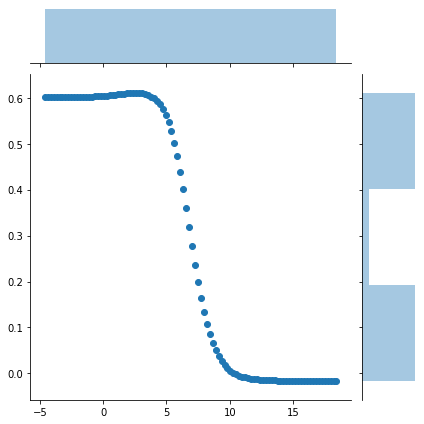

In [107]:
sns.jointplot(x=np.log(param_range),y=test_mean) #highest point is from the max above 

In [108]:
np.where(test_mean==max(test_mean))

(array([30]),)

In [109]:
param_range[30]

10.722672220103231

In [110]:
ln_r_best=Ridge(alpha=param_range[30])

In [111]:
ln_r_best.fit(X_train_s,Y_train)

Ridge(alpha=10.722672220103231, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [112]:
r2_score(Y_test,ln_r_best.predict(X_test_s))

0.5484002193656544

In [113]:
r2_score(Y_train,ln_r_best.predict(X_train_s))

0.640419642370061

In [114]:
print(ln_r_best.intercept_,ln_r_best.coef_)

1539.893500006977 [-44.70585365 -83.3554588  -19.85112486 -16.68593729 325.75784835
  77.02255761  51.37021013  45.75696738 -32.57036176 -60.17726451
  15.72781789 -46.10192531]


In [115]:
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)



In [116]:
print ("Ridge model:", pretty_print_coefs(ln_r_best.coef_)) #https://www.datacamp.com/community/tutorials/feature-selection-python

Ridge model: -44.706 * X0 + -83.355 * X1 + -19.851 * X2 + -16.686 * X3 + 325.758 * X4 + 77.023 * X5 + 51.37 * X6 + 45.757 * X7 + -32.57 * X8 + -60.177 * X9 + 15.728 * X10 + -46.102 * X11


In [117]:
# info about ridge method https://machinelearningmastery.com/ridge-regression-with-python/ https://scikit-learn.org/stable/modules/linear_model.html
# http://www.science.smith.edu/~jcrouser/SDS293/labs/lab10-py.html As expected, none of the coefficients are exactly zero - ridge regression does not perform variable selection!

In [118]:
y_pred2=ln_r_best.predict(X_test)

In [119]:
from sklearn import metrics 

print('MAE:', metrics.mean_absolute_error(Y_test,y_pred2))
print('MSE:',metrics.mean_squared_error(Y_test,y_pred2))
print('RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred2)))

MAE: 196.5666886712077
MSE: 76907.02450566705
RMSE: 277.3211576956707


In [120]:
print('* 1 R2:',r2_score(Y_test,Y_test_a))
print('* 2 R2:', r2_score(Y_test,ln_r.predict(X_test_s)))
print('* 3 R2:', r2_score(Y_test,ln_r_best.predict(X_test_s)))
print('*')
print('* 1 MAE:', metrics.mean_absolute_error(Y_test,y_pred))
print('* 2 MAE:', metrics.mean_absolute_error(Y_test,y_pred3))
print('* 3 MAE:', metrics.mean_absolute_error(Y_test,y_pred2))
print('*')
print('* 1 MSE:',metrics.mean_squared_error(Y_test,y_pred))
print('* 2 MSE:',metrics.mean_squared_error(Y_test,y_pred3))
print('* 3 MSE:',metrics.mean_squared_error(Y_test,y_pred2))
print('*')
print('* 1 RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print('* 2 RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred3)))
print('* 3 RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred2)))

# here is looks like hte simple linergression has done the best job 

* 1 R2: 0.5301324433530405
* 2 R2: 0.5311084326885036
* 3 R2: 0.5484002193656544
*
* 1 MAE: 186.14688576604513
* 2 MAE: 198.40525365202362
* 3 MAE: 196.5666886712077
*
* 1 MSE: 70272.37349936174
* 2 MSE: 79851.79976631577
* 3 MSE: 76907.02450566705
*
* 1 RMSE: 265.0893688916282
* 2 RMSE: 282.58060755528817
* 3 RMSE: 277.3211576956707


balcony_no, heating_central type_townhouse

* 1 R2: 0.6159440296762957
* 2 R2: 0.6174031394628763
* 3 R2: 0.6213596910964827
*
* 1 MAE: 197.7988313912914
* 2 MAE: 232.95603654988764
* 3 MAE: 221.37599426742776
*
* 1 MSE: 64531.983305969894
* 2 MSE: 88971.32132606163
* 3 MSE: 79362.26537433332
*
* 1 RMSE: 254.03146125228247
* 2 RMSE: 298.28060836410674
* 3 RMSE: 281.7130905271058

no change with a different type of standard or z 

-----------------------------

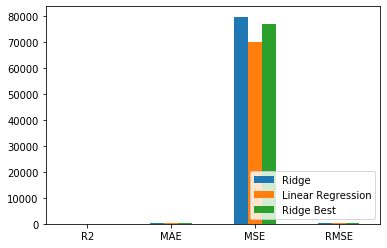

In [121]:
LR_metrics =np.array([r2_score(Y_test,Y_test_a),metrics.mean_absolute_error(Y_test,y_pred),metrics.mean_squared_error(Y_test,y_pred),np.sqrt(metrics.mean_squared_error(Y_test,y_pred))])
R_metrics=np.array([r2_score(Y_test,ln_r.predict(X_test_s)),metrics.mean_absolute_error(Y_test,y_pred3),metrics.mean_squared_error(Y_test,y_pred3),np.sqrt(metrics.mean_squared_error(Y_test,y_pred3))])
RB_metrics=np.array([r2_score(Y_test,ln_r_best.predict(X_test_s)),metrics.mean_absolute_error(Y_test,y_pred2),metrics.mean_squared_error(Y_test,y_pred2),np.sqrt(metrics.mean_squared_error(Y_test,y_pred2))])
index = ['R2', 'MAE', 'MSE','RMSE']
df_metrics = pd.DataFrame({'Ridge': R_metrics, 'Linear Regression': LR_metrics,'Ridge Best': RB_metrics}, index=index)
df_metrics.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()


In [122]:
LR_metrics2=np.delete(LR_metrics,2)
R_metrics2=np.delete(R_metrics,2)
RB_metrics2=np.delete(RB_metrics,2)


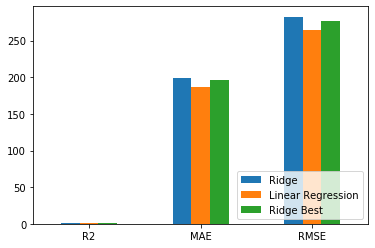

In [123]:
index = ['R2', 'MAE','RMSE']
df_metrics = pd.DataFrame({'Ridge': R_metrics2, 'Linear Regression': LR_metrics2,'Ridge Best': RB_metrics2}, index=index)
df_metrics.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()

looks like LN is still doing the best even with the additional data, need to get the coefficients for it and their importance or can just use the thing from the start? 

In [124]:
def rmse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))*100

    return loss #https://stackoverflow.com/questions/53165807/how-to-calculate-rmspe-in-python-using-numpy
# should be times 100? also should b divided by n? 
# maybe not? https://www.kaggle.com/c/rossmann-store-sales/overview/evaluation
# mean returns the average of the array, would be the same as dividing by the number n from the formula 


In [125]:
rmse(Y_test,y_pred)

17.221329596005138

In [126]:
rmse(Y_test,y_pred2)

17.634724435573517

In [127]:
rmse(Y_test,y_pred3)

18.176813734685982

In [128]:
print('* 1 R2:',r2_score(Y_test,Y_test_a))
print('* 2 R2:', r2_score(Y_test,ln_r.predict(X_test_s)))
print('* 3 R2:', r2_score(Y_test,ln_r_best.predict(X_test_s)))
print('*')
print('* 1 MAE:', metrics.mean_absolute_error(Y_test,y_pred))
print('* 2 MAE:', metrics.mean_absolute_error(Y_test,y_pred3))
print('* 3 MAE:', metrics.mean_absolute_error(Y_test,y_pred2))
print('*')
print('* 1 MSE:',metrics.mean_squared_error(Y_test,y_pred))
print('* 2 MSE:',metrics.mean_squared_error(Y_test,y_pred3))
print('* 3 MSE:',metrics.mean_squared_error(Y_test,y_pred2))
print('*')
print('* 1 RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print('* 2 RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred3)))
print('* 3 RMSE:',np.sqrt(metrics.mean_squared_error(Y_test,y_pred2)))
print('*')
print('* 1 RMSPE:',rmse(Y_test,y_pred))
print('* 2 RMSPE:',rmse(Y_test,y_pred3))
print('* 3 RMSPE:',rmse(Y_test,y_pred2))

* 1 R2: 0.5301324433530405
* 2 R2: 0.5311084326885036
* 3 R2: 0.5484002193656544
*
* 1 MAE: 186.14688576604513
* 2 MAE: 198.40525365202362
* 3 MAE: 196.5666886712077
*
* 1 MSE: 70272.37349936174
* 2 MSE: 79851.79976631577
* 3 MSE: 76907.02450566705
*
* 1 RMSE: 265.0893688916282
* 2 RMSE: 282.58060755528817
* 3 RMSE: 277.3211576956707
*
* 1 RMSPE: 17.221329596005138
* 2 RMSPE: 18.176813734685982
* 3 RMSPE: 17.634724435573517


In [129]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

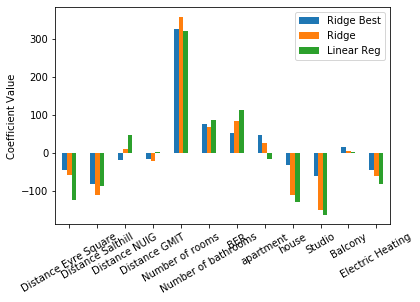

In [138]:


LR_metrics =lm3.coef_
R_metric=ln_r.coef_
RB_metrics=ln_r_best.coef_
index = ['Distance Eyre Square', 'Distance Salthill', 'Distance NUIG','Distance GMIT','Number of rooms','Number of bathrooms','BER','apartment','house','Studio','Balcony','Electric Heating']
df_metrics = pd.DataFrame({'Ridge Best': RB_metrics, 'Ridge': R_metric,'Linear Reg':LR_metrics}, index=index)


df_metrics.plot.bar(rot=0)
plt.xticks(rotation=30, horizontalalignment="center")
plt.ylabel('Coefficient Value')
plt.legend(loc="upper right")
plt.show()


No handles with labels found to put in legend.


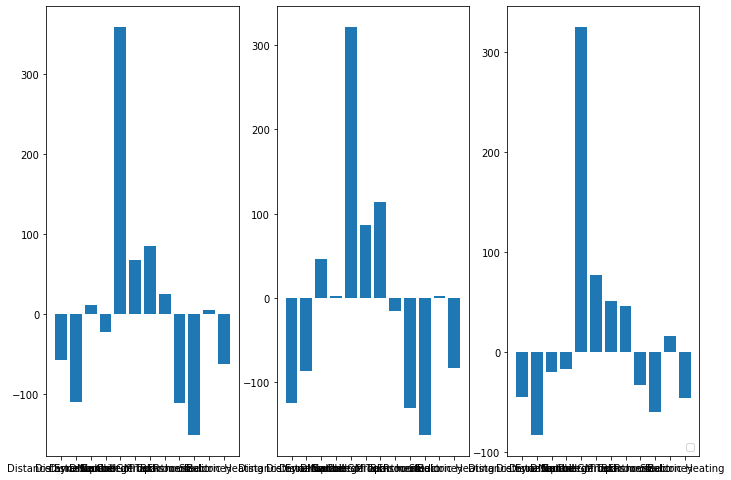

In [131]:
from matplotlib import pyplot
import seaborn

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

LR_metrics =lm3.coef_
R_metric=ln_r.coef_
RB_metrics=ln_r_best.coef_
index = ['Distance Eyre Square', 'Distance Salthill', 'Distance College','Distance GMIT','Number of rooms','Number of bathrooms','BER','apartment','house','Studio','Balconey','Electric Heating']
df_metrics = pd.DataFrame({'Ridge Best': RB_metrics, 'Ridge': R_metric,'Linear Reg':LR_metrics}, index=index)

plt.subplot(1,3,1)
plt.bar(list(df_metrics.index),df_metrics['Ridge'])
plt.subplot(1,3,2)
plt.bar(list(df_metrics.index),df_metrics['Linear Reg'])
plt.subplot(1,3,3)
plt.bar(list(df_metrics.index),df_metrics['Ridge Best'])

plt.legend(loc="lower right")
plt.show()


No handles with labels found to put in legend.


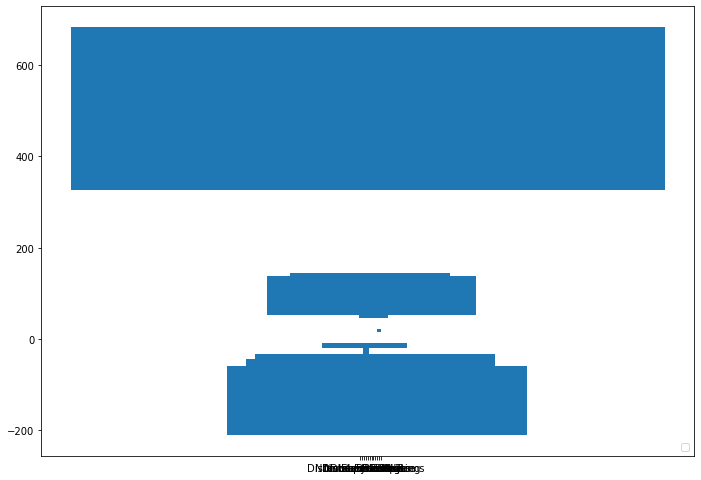

In [132]:
from matplotlib import pyplot
import seaborn

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

LR_metrics =lm3.coef_
R_metric=ln_r.coef_
RB_metrics=ln_r_best.coef_
index = ['Distance Eyre Square', 'Distance Salthill', 'Distance College','Distance GMIT','Number of rooms','Number of bathrooms','BER','apartment','house','Studio','Balconey','Electric Heating']
df_metrics = pd.DataFrame({'Ridge Best': RB_metrics, 'Ridge': R_metric,'Linear Reg':LR_metrics}, index=index)


plt.bar(list(df_metrics.index),df_metrics['Ridge'],df_metrics['Linear Reg'],df_metrics['Ridge Best'])


plt.legend(loc="lower right")
plt.show()


In [133]:
df_metrics

,Ridge Best,Ridge,Linear Reg
Distance Eyre Square,-44.705854,-57.602064,-124.037797
Distance Salthill,-83.355459,-110.516503,-86.794242
Distance College,-19.851125,11.045337,45.956057
Distance GMIT,-16.685937,-22.538814,2.842665
Number of rooms,325.757848,358.969361,321.405265
Number of bathrooms,77.022558,67.857909,86.413687
BER,51.370210,85.298151,113.608834
apartment,45.756967,25.341944,-15.390011
house,-32.570362,-111.726747,-130.061433
Studio,-60.177265,-152.014034,-162.805341


No handles with labels found to put in legend.


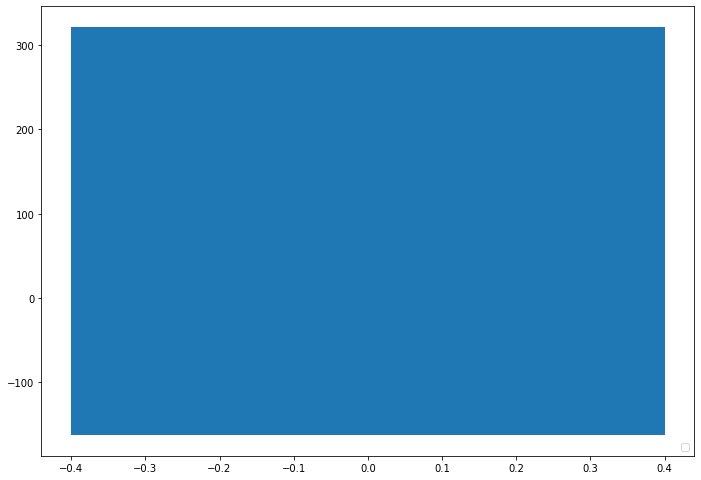

In [134]:
from matplotlib import pyplot
import seaborn

a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)

LR_metrics =lm3.coef_
R_metric=ln_r.coef_
RB_metrics=ln_r_best.coef_



plt.bar(0,lm3.coef_ )
plt.legend(loc="lower right")
plt.show()

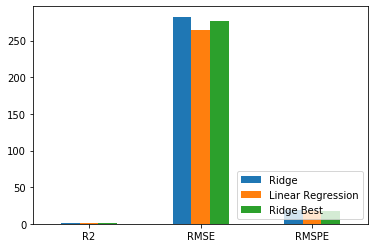

In [135]:
LR2_metrics =np.array([r2_score(Y_test,Y_test_a),np.sqrt(metrics.mean_squared_error(Y_test,y_pred)),rmse(Y_test,y_pred)])
R2_metrics=np.array([r2_score(Y_test,ln_r.predict(X_test_s)),np.sqrt(metrics.mean_squared_error(Y_test,y_pred3)),rmse(Y_test,y_pred3)])
RB2_metrics=np.array([r2_score(Y_test,ln_r_best.predict(X_test_s)),np.sqrt(metrics.mean_squared_error(Y_test,y_pred2)),rmse(Y_test,y_pred2)])

index2 = ['R2','RMSE','RMSPE']
df_metrics2 = pd.DataFrame({'Ridge': R2_metrics, 'Linear Regression': LR2_metrics,'Ridge Best': RB2_metrics}, index=index2)
df_metrics2.plot.bar(rot=0)
plt.legend(loc="lower right")
plt.show()




In [136]:
df_metrics2

,Ridge,Linear Regression,Ridge Best
R2,0.531108,0.530132,0.548400
RMSE,282.580608,265.089369,277.321158
RMSPE,18.176814,17.221330,17.634724


KeyError: 0

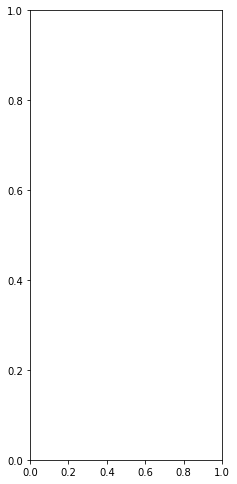

In [137]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)


index = ['R2','RMSE','RMSPE']
#df_metrics = pd.DataFrame({'Ridge Best': RB2_metrics, 'Ridge': R2_metrics,'Linear Reg':LR2_metrics}, index=index)




plt.subplot(1,3,1)
plt.bar(list(df_metrics2[0]),df_metrics2['R2'])
plt.subplot(1,3,2)
plt.bar(list(df_metrics2.index),df_metrics2['Linear Regression'])
plt.subplot(1,3,3)
plt.bar(list(df_metrics2.index),df_metrics2['Ridge Best'])

plt.legend(loc="lower right")
plt.show()